## Analysis of BMW Global Sales

In this project, we use a dataset from [Kaggle](https://www.kaggle.com/datasets/payaldhokane/bmw-global-sales-and-market-data), which gives us  information on 
- sales volume
- vehicle models
- segments 
- engine types
- pricing 
- marketing spend 
- dealership presence 
- fuel prices
- and macro-economic indicators such as GDP growth and interest rates.

Note: This is a training dataset and does not correspond to the actual figures.

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Basic Information about the Dataset

In [3]:
df = pd.read_csv('bmw_global_sales_dataset.csv')
df.head()

,year,month,country,model,segment,engine_type,price_usd,marketing_spend_usd,dealership_count,fuel_price_usd,gdp_growth_percent,interest_rate_percent,competition_index,units_sold
0,2021,1,Australia,X1,SUV,Petrol,82234,315372,96,0.97,6.29,1.2,8,324
1,2018,8,Australia,i4,Sedan,Electric,82291,447798,234,0.97,6.29,1.2,7,556
2,2022,12,USA,5 Series,Electric,Hybrid,40594,259755,25,0.97,6.29,1.2,7,152
3,2019,11,Australia,i7,SUV,Electric,42371,323541,319,0.97,6.29,1.2,5,730
4,2021,12,Brazil,X5,SUV,Diesel,82315,482015,367,0.97,6.29,1.2,2,1156


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1000 non-null   int64  
 1   month                  1000 non-null   int64  
 2   country                1000 non-null   object 
 3   model                  1000 non-null   object 
 4   segment                1000 non-null   object 
 5   engine_type            1000 non-null   object 
 6   price_usd              1000 non-null   int64  
 7   marketing_spend_usd    1000 non-null   int64  
 8   dealership_count       1000 non-null   int64  
 9   fuel_price_usd         1000 non-null   float64
 10  gdp_growth_percent     1000 non-null   float64
 11  interest_rate_percent  1000 non-null   float64
 12  competition_index      1000 non-null   int64  
 13  units_sold             1000 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 109.5+ K

In [5]:
df.describe()

,year,month,price_usd,marketing_spend_usd,dealership_count,fuel_price_usd,gdp_growth_percent,interest_rate_percent,competition_index,units_sold
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,2019.448000,6.487000,76535.747000,279492.230000,200.230000,9.700000e-01,6.290000e+00,1.200000e+00,5.572000,633.192000
std,2.912005,3.510863,25360.933749,127010.559722,113.096127,1.977186e-14,3.199042e-14,2.265988e-14,2.944059,263.346628
min,2015.000000,1.000000,35060.000000,50363.000000,10.000000,9.700000e-01,6.290000e+00,1.200000e+00,1.000000,15.000000
25%,2017.000000,3.000000,54578.750000,173552.250000,101.750000,9.700000e-01,6.290000e+00,1.200000e+00,3.000000,432.750000
50%,2019.000000,7.000000,75726.000000,278733.500000,197.000000,9.700000e-01,6.290000e+00,1.200000e+00,6.000000,630.000000
75%,2022.000000,10.000000,98730.250000,390110.000000,297.000000,9.700000e-01,6.290000e+00,1.200000e+00,8.000000,842.500000
max,2024.000000,12.000000,119817.000000,498927.000000,399.000000,9.700000e-01,6.290000e+00,1.200000e+00,10.000000,1242.000000


## EDA (Exploratory Data Analysis)

From the analysis performed, we have gained the following insights:

1. The mean prices of Electric, SUV and Sedans are almost equal, with similar sales in all 3.
2. The mean price of Petrol cars are higher than Electric, Hybrid and Diesel, all 3 of which have almost similar distributions.
3. The X3, 3 Series and the i4 are the top 3 selling models
4. Top 5 after marketing revenue makers are: 
    1. X3 Electric
    2. X5 Electric
    3. 3 Series Petrol
    4. i4 Hybrid
    5. i4 Petrol
5. Least 5 after marketing revenue markers are:
    1. iX Electric
    2. iX Petrol
    3. X7 Petrol
    4. X7 Hybrid
    5. i7 Hybrid

In [22]:
# Total Cars from each segment
df['segment'].value_counts()

segment
Electric    341
SUV         331
Sedan       328
Name: count, dtype: int64

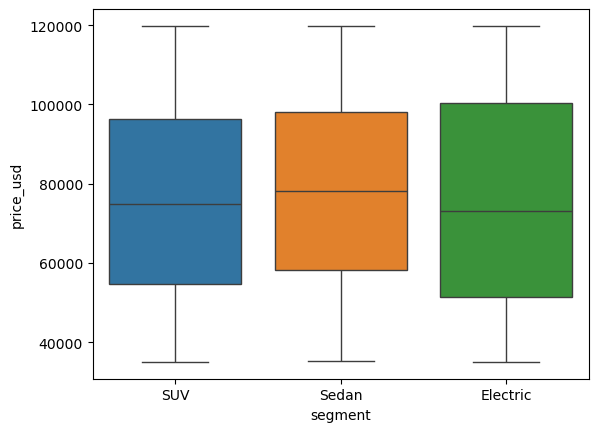

Mean Prices are: 
segment
Electric    76022.278592
SUV         75351.700906
Sedan       78264.442073
Name: price_usd, dtype: float64


In [56]:
# Plot between Price and Segment

sns.boxplot(x='segment',y='price_usd',data = df,hue = 'segment',)
plt.show()

mean_prices = df.groupby('segment')['price_usd'].mean()
print(f"Mean Prices are: \n{mean_prices}")

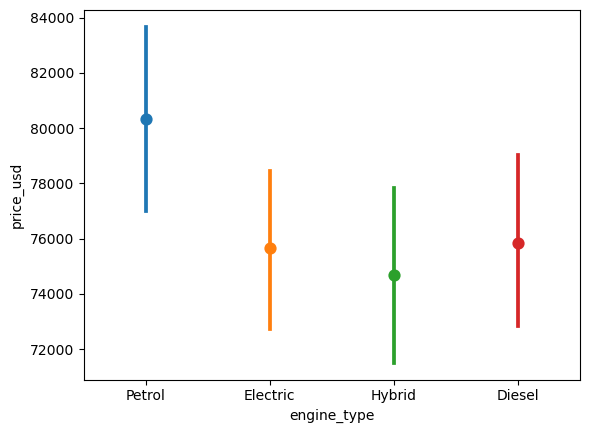

Mean Prices based on Engine Type:
engine_type
Diesel      75835.772908
Electric    75667.635338
Hybrid      74673.686508
Petrol      80327.307359
Name: price_usd, dtype: float64


In [35]:
# Plot between Engine Type and Price

sns.pointplot(data = df, x='engine_type', y= 'price_usd', hue = 'engine_type')
plt.show()

mean_price_ET = df.groupby('engine_type')['price_usd'].mean()
print(f"Mean Prices based on Engine Type:\n{mean_price_ET}")

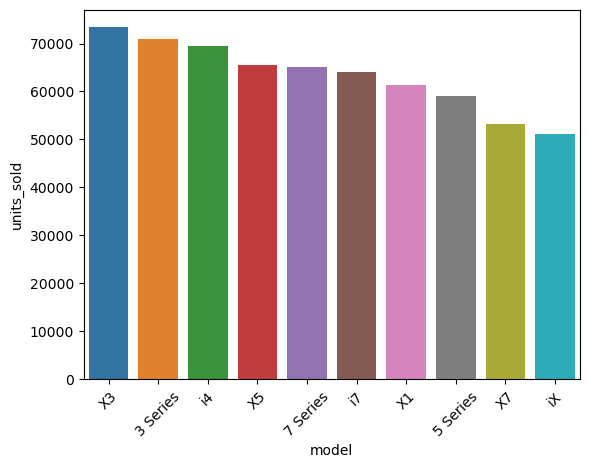

,model,units_sold
4,X3,73358
0,3 Series,70886
7,i4,69528
5,X5,65505
2,7 Series,65071


In [62]:
# Sales by Model
model_sales = df.groupby('model')['units_sold'].sum().reset_index().sort_values(by = 'units_sold',ascending=False)

sns.barplot(data = model_sales, x= 'model',y='units_sold', hue = 'model')
plt.xticks(rotation = 45)
plt.show()

model_sales.head()


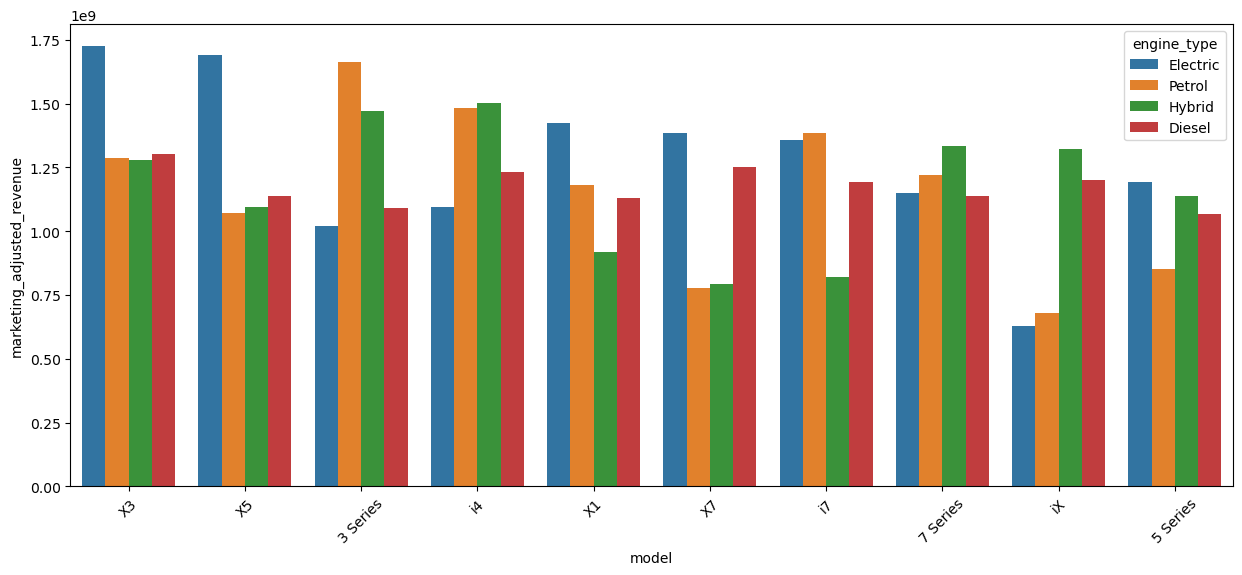

Top 5 Profitable Cars: 


,model,engine_type,marketing_spend_usd,revenue,marketing_adjusted_revenue
17,X3,Electric,10279398,1734864617,1724585219
21,X5,Electric,10455463,1703146426,1692690963
3,3 Series,Petrol,10633786,1674089530,1663455744
30,i4,Hybrid,9484093,1513094487,1503610394
31,i4,Petrol,8376949,1489779099,1481402150


Least Profitable Cars: 


,model,engine_type,marketing_spend_usd,revenue,marketing_adjusted_revenue
34,i7,Hybrid,4189124,824754549,820565425
26,X7,Hybrid,6150842,799311098,793160256
27,X7,Petrol,4184351,780137918,775953567
39,iX,Petrol,3361467,681169186,677807719
37,iX,Electric,3628400,633557732,629929332


In [87]:
# Creating a column 'revenue' and grouping to find out which model,fuel type combination made the most after marketing revenue
df['revenue'] = df['price_usd']*df['units_sold']

grouped = (
    df.groupby(['model', 'engine_type'])
      .agg({
          'marketing_spend_usd': 'sum',
          'revenue': 'sum'

      })
      .reset_index()
)

grouped['marketing_adjusted_revenue']=grouped['revenue']-grouped['marketing_spend_usd'] 
grouped = grouped.sort_values(by='marketing_adjusted_revenue', ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(data=grouped,x='model',y='marketing_adjusted_revenue',hue='engine_type')
plt.xticks(rotation = 45)
plt.show()

print("Top 5 Profitable Cars: ")
display(grouped.head())

print("Least Profitable Cars: ")
display(grouped.tail())